In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import jaconv
import re
import pickle as pkl

# Change fontype of pyplot
import matplotlib.font_manager
#print([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams['font.family'] = 'MS Gothic'

Load Data

In [16]:
df = pd.read_csv("data/SuperD_Class2_tochi_sample_xdm.csv")
# load code data
df_code = pd.read_csv("data/SuperD_Class2_shicyoukuson_code_utf8.csv")
# create dict
code2lng, code2lat = ({} for _ in range(2))
for i in range(len(df_code)):
    code = str(df_code["コード"].iloc[i])
    if (len(code) == 5):
        code = code[0:4]
    else:
        code = code[0:5]
    code2lng.update({int(code): df_code["経度"].iloc[i]})
    code2lat.update({int(code): df_code["緯度"].iloc[i]})
# longitude and latitude
df["longitude"] = df["市区町村コード"].map(code2lng)
df["latitude"] = df["市区町村コード"].map(code2lat)

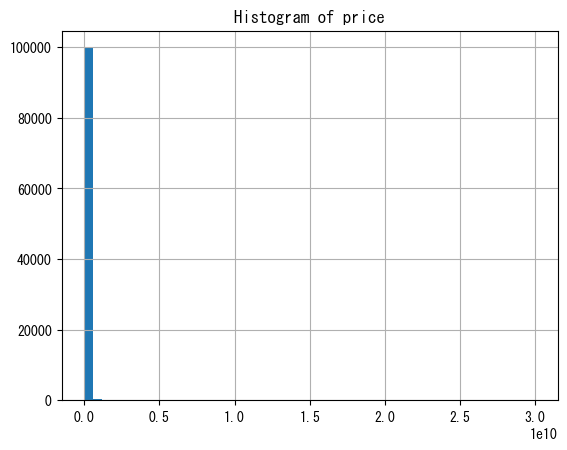

In [17]:
#Histogram of price
df["取引価格（総額）"].hist(bins = 50)
plt.title("Histogram of price")
plt.show()

In [18]:
df["取引価格（総額）"].describe()

count    1.000000e+05
mean     2.762968e+07
std      1.371699e+08
min      1.000000e+02
25%      4.800000e+06
50%      1.400000e+07
75%      3.000000e+07
max      3.000000e+10
Name: 取引価格（総額）, dtype: float64

In [19]:
df.sort_values(by = "取引価格（総額）", ascending = False, inplace = True)

In [20]:
df.head()

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,longitude,latitude
91842,6695,宅地(土地と建物),商業地,13103,東京都,港区,赤坂,乃木坂,1,30000000000,...,都道,13.5,商業地域,80.0,500.0,2018年第１四半期,NaN,NaN,139.751599,35.658068
73278,88465,宅地(土地),住宅地,11108,埼玉県,さいたま市南区,沼影,武蔵浦和,2,9000000000,...,市道,9.0,商業地域,80.0,500.0,2008年第３四半期,NaN,NaN,139.645352,35.845253
89390,41787,宅地(土地と建物),商業地,27144,大阪府,堺市西区,鳳東町,鳳,7,8100000000,...,府道,22.0,準工業地域,60.0,200.0,2020年第３四半期,NaN,NaN,135.463972,34.534999
66930,3621,宅地(土地),住宅地,14101,神奈川県,横浜市鶴見区,矢向,尻手,11,6600000000,...,市道,13.5,準工業地域,60.0,200.0,2019年第１四半期,NaN,NaN,139.682540,35.508404
43362,381209,宅地(土地),工業地,13227,東京都,羽村市,神明台,羽村,13,6400000000,...,都道,25.0,工業地域,60.0,200.0,2019年第２四半期,NaN,NaN,139.310944,35.767222


In [21]:
cond = df["都道府県名"] == "東京都"
df2 = df.loc[cond]
df2.head()

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,longitude,latitude
91842,6695,宅地(土地と建物),商業地,13103,東京都,港区,赤坂,乃木坂,1,30000000000,...,都道,13.5,商業地域,80.0,500.0,2018年第１四半期,NaN,NaN,139.751599,35.658068
43362,381209,宅地(土地),工業地,13227,東京都,羽村市,神明台,羽村,13,6400000000,...,都道,25.0,工業地域,60.0,200.0,2019年第２四半期,NaN,NaN,139.310944,35.767222
61861,9475,宅地(土地と建物),商業地,13103,東京都,港区,虎ノ門,虎ノ門,2,5600000000,...,区道,11.0,商業地域,80.0,700.0,2022年第１四半期,NaN,NaN,139.751599,35.658068
84422,1162,宅地(土地と建物),商業地,13101,東京都,千代田区,麹町,半蔵門,3,5200000000,...,区道,11.0,商業地域,80.0,700.0,2020年第４四半期,NaN,私道を含む取引,139.753595,35.694003
55633,56717,宅地(土地と建物),商業地,13102,東京都,中央区,銀座,新富町(東京),2,5000000000,...,区道,15.0,商業地域,80.0,600.0,2011年第１四半期,NaN,NaN,139.771861,35.670651


In [22]:
df["log_price"] = np.log(df["取引価格（総額）"])

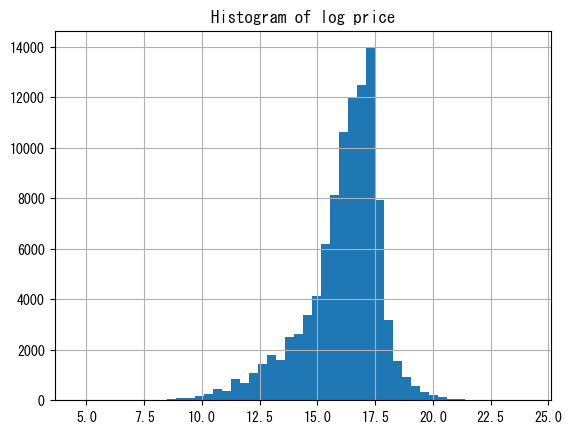

In [23]:
df["log_price"].hist(bins = 50)
plt.title("Histogram of log price")
plt.show()

In [24]:
df["log_price"].describe()

count    100000.000000
mean         16.087311
std           1.694039
min           4.605170
25%          15.384126
50%          16.454568
75%          17.216708
max          24.124463
Name: log_price, dtype: float64

Transaction Date

In [25]:
df["取引時点"].value_counts()

取引時点
2020年第４四半期    1835
2012年第４四半期    1752
2021年第４四半期    1732
2013年第４四半期    1722
2018年第４四半期    1721
              ... 
2006年第４四半期     403
2006年第２四半期     400
2006年第１四半期     251
2005年第３四半期     242
2005年第４四半期     229
Name: count, Length: 72, dtype: int64

In [26]:
# Create a dataframe
df_time = pd.DataFrame(df["取引時点"].value_counts())
# Find how many unique quarters in the data
print(set(df_time.index.str[6]))
# make a dictionary out of it for further use
quarterly_dict = {'１': 1, '２': 4, '３': 7, '４': 10}


{'１', '３', '２', '４'}


In [27]:
set(df_time.index.str[6])

{'１', '２', '３', '４'}

In [28]:
transaction_date2date = {}
for i in range(len(df_time)):
    # the original str
    transaction_date = df_time.index[i]
    # year
    year_num = df_time.index[i][0:4]
    # quarterly to month
    month_num = quarterly_dict[df_time.index[i][6]]
    date = datetime.datetime.strptime(str(year_num) + str(month_num), "%Y%m")
    transaction_date2date.update({transaction_date: date})
transaction_date2date

{'2020年第４四半期': datetime.datetime(2020, 10, 1, 0, 0),
 '2012年第４四半期': datetime.datetime(2012, 10, 1, 0, 0),
 '2021年第４四半期': datetime.datetime(2021, 10, 1, 0, 0),
 '2013年第４四半期': datetime.datetime(2013, 10, 1, 0, 0),
 '2018年第４四半期': datetime.datetime(2018, 10, 1, 0, 0),
 '2014年第４四半期': datetime.datetime(2014, 10, 1, 0, 0),
 '2020年第３四半期': datetime.datetime(2020, 7, 1, 0, 0),
 '2021年第３四半期': datetime.datetime(2021, 7, 1, 0, 0),
 '2014年第１四半期': datetime.datetime(2014, 1, 1, 0, 0),
 '2021年第２四半期': datetime.datetime(2021, 4, 1, 0, 0),
 '2015年第４四半期': datetime.datetime(2015, 10, 1, 0, 0),
 '2021年第１四半期': datetime.datetime(2021, 1, 1, 0, 0),
 '2016年第２四半期': datetime.datetime(2016, 4, 1, 0, 0),
 '2013年第３四半期': datetime.datetime(2013, 7, 1, 0, 0),
 '2015年第２四半期': datetime.datetime(2015, 4, 1, 0, 0),
 '2016年第４四半期': datetime.datetime(2016, 10, 1, 0, 0),
 '2017年第４四半期': datetime.datetime(2017, 10, 1, 0, 0),
 '2017年第３四半期': datetime.datetime(2017, 7, 1, 0, 0),
 '2010年第４四半期': datetime.datetime(2010, 10, 1, 0, 0),
 '

In [29]:
df["date"] = df["取引時点"].map(transaction_date2date)

In [30]:
df["date"].value_counts()

date
2020-10-01    1835
2012-10-01    1752
2021-10-01    1732
2013-10-01    1722
2018-10-01    1721
              ... 
2006-10-01     403
2006-04-01     400
2006-01-01     251
2005-07-01     242
2005-10-01     229
Name: count, Length: 72, dtype: int64

Mean log price

In [31]:
# Know the difference: apply and transform
#df["date_mean_log_price"] = df.groupby("date")["log_price"].transform(np.mean)
df_date = pd.DataFrame(df.groupby("date")["log_price"].apply(np.mean))
df_date

,log_price
date,
2005-07-01,16.977016
2005-10-01,17.005314
2006-01-01,17.031322
2006-04-01,16.802119
2006-07-01,16.717295
...,...
2022-04-01,16.105052
2022-07-01,16.126047
2022-10-01,16.051738


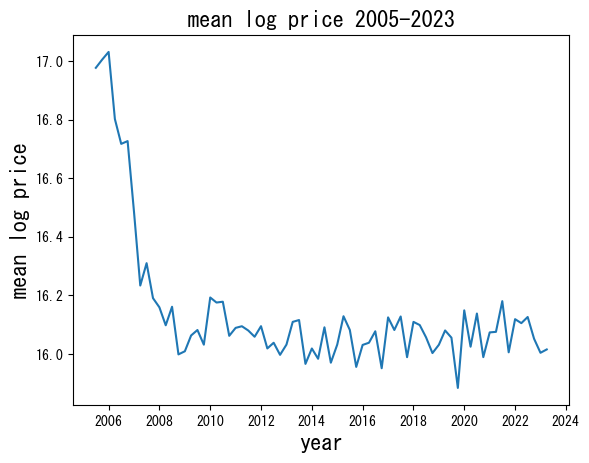

In [32]:
# Where did this seasonality come from?
plt.plot(df_date["log_price"])
plt.title("mean log price 2005-2023",size=16)
plt.xlabel("year",size=16)
plt.ylabel("mean log price",size=16)
plt.show()

In [33]:
df["面積（㎡）"].value_counts()

面積（㎡）
65      2928
70      2920
60      2342
200     2317
75      2253
        ... 
4700      37
4100      36
10        35
4800      34
4600      32
Name: count, Length: 160, dtype: int64

In [34]:
df_area = pd.DataFrame(df["面積（㎡）"].value_counts())

In [35]:
square_meters2area = {}
for i in range(len(df_area)):
    square_meters = df_area.index[i]
    area = re.sub("㎡以上", "", square_meters)
    area = re.sub("m&sup2;以上", "", area)
    area = re.sub(",", "", area)
    area = int(area)
    square_meters2area.update({square_meters: area})

In [36]:
df["area"] = df["面積（㎡）"].map(square_meters2area)

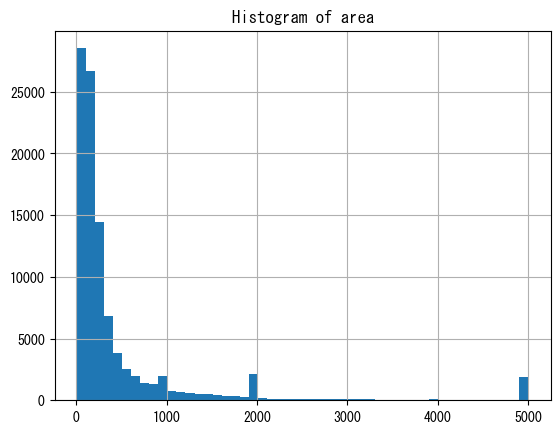

In [37]:
df["area"].hist(bins=50)
plt.title("Histogram of area")
plt.show()

In [38]:
df["種類"].value_counts()

種類
宅地(土地と建物)    36375
宅地(土地)       34543
中古マンション等     16183
農地            8721
林地            4178
Name: count, dtype: int64

In [39]:
df = pd.get_dummies(df, columns=["種類"])

Circumstances

In [40]:
# Check -> Interesting
df['取引の事情等'].value_counts()

取引の事情等
私道を含む取引                  2652
調停・競売等                   1996
隣地の購入                     423
関係者間取引                    290
調停・競売等、私道を含む取引             78
その他事情有り                    28
隣地の購入、私道を含む取引              20
瑕疵有りの可能性                   12
古屋付き・取壊し前提                  9
関係者間取引、私道を含む取引              6
隣地の購入、関係者間取引                5
他の権利・負担付き                   2
瑕疵有りの可能性、私道を含む取引            2
隣地の購入、調停・競売等                2
私道を含む取引、その他事情有り             2
古屋付き・取壊し前提、私道を含む取引          1
関係者間取引、調停・競売等               1
関係者間取引、調停・競売等、私道を含む取引       1
Name: count, dtype: int64

In [41]:
# Create Dummies
df = pd.get_dummies(df, columns=['取引の事情等'])

Create a feature dataframe and a target dataframe

In [42]:
df.columns

Index(['No', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '最寄駅：距離（分）',
       '取引価格（総額）', '坪単価', '間取り', '面積（㎡）', '取引価格（㎡単価）', '土地の形状', '間口',
       '延床面積（㎡）', '建築年', '建物の構造', '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類',
       '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時点', '改装', 'longitude',
       'latitude', 'log_price', 'date', 'area', '種類_中古マンション等', '種類_宅地(土地)',
       '種類_宅地(土地と建物)', '種類_林地', '種類_農地', '取引の事情等_その他事情有り', '取引の事情等_他の権利・負担付き',
       '取引の事情等_古屋付き・取壊し前提', '取引の事情等_古屋付き・取壊し前提、私道を含む取引', '取引の事情等_瑕疵有りの可能性',
       '取引の事情等_瑕疵有りの可能性、私道を含む取引', '取引の事情等_私道を含む取引', '取引の事情等_私道を含む取引、その他事情有り',
       '取引の事情等_調停・競売等', '取引の事情等_調停・競売等、私道を含む取引', '取引の事情等_関係者間取引',
       '取引の事情等_関係者間取引、私道を含む取引', '取引の事情等_関係者間取引、調停・競売等',
       '取引の事情等_関係者間取引、調停・競売等、私道を含む取引', '取引の事情等_隣地の購入', '取引の事情等_隣地の購入、私道を含む取引',
       '取引の事情等_隣地の購入、調停・競売等', '取引の事情等_隣地の購入、関係者間取引'],
      dtype='object')

In [43]:
# NOTE: I simply copy and pasted the ones I needed
df_x = df[[
    "area", "longitude", "latitude", '種類_中古マンション等',
    '種類_宅地(土地)', '種類_宅地(土地と建物)', '種類_林地', '種類_農地',
    '取引の事情等_その他事情有り',
    '取引の事情等_他の権利・負担付き',
    '取引の事情等_古屋付き・取壊し前提', '取引の事情等_瑕疵有りの可能性',
    '取引の事情等_私道を含む取引', '取引の事情等_調停・競売等', '取引の事情等_私道を含む取引、その他事情有り',
    '取引の事情等_調停・競売等', '取引の事情等_調停・競売等、私道を含む取引',
    '取引の事情等_関係者間取引', '取引の事情等_関係者間取引、私道を含む取引', '取引の事情等_隣地の購入',
    '取引の事情等_隣地の購入、私道を含む取引', '取引の事情等_隣地の購入、調停・競売等',
    '取引の事情等_隣地の購入、関係者間取引'
]]
# Target
df_y = df[["log_price"]]

In [44]:
# save as pickle
with open('df_x.pickle', 'wb') as f:
    pkl.dump(df_x, f)
with open('df_y.pickle', 'wb') as f:
    pkl.dump(df_y, f)

In [45]:
# load pickle
with open('df_x.pickle', 'rb') as f:
    df_x = pkl.load(f)
with open('df_y.pickle', 'rb') as f:
    df_y = pkl.load(f)

# learning

In [46]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [47]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(df_x.values,df_y.values,
                                                    test_size=0.6,random_state=123)

# train dev test
#x_train, x_dev_test, y_train, y_dev_test = train_test_split(df_x.values,df_y.values,test_size=0.6)
# dev test split
#x_dev, x_test, y_dev, y_test = train_test_split(x_dev_test,y_dev_test,test_size=0.5)

In [48]:
y_train = np.reshape(y_train, [-1])
y_test  = np.reshape(y_test, [-1])
#y_dev   = np.reshape(y_dev, [-1])

In [49]:
def bool2float (ndarray):
    for i in range(len(ndarray)):
        for j in range(len(ndarray[i])):
            if ndarray[i][j] == True:
                ndarray[i][j] = 1
            elif ndarray[i][j] == False:
                ndarray[i][j] = 0
            else:
                pass
    return ndarray

In [50]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [54]:
x_train.dtype
x_test.dtype

dtype('float64')

In [51]:
# stats model
reg_linear = sm.OLS(y_train, x_train)
result = reg_linear.fit()
# prediction
y_test_linear = result.predict(x_test)

In [55]:
# stats model
reg_linear = sm.OLS(y_train, x_train)
result = reg_linear.fit()
# prediction
y_test_linear = result.predict(x_test)
# Test Error
print(mean_squared_error(y_test_linear, y_test))

1.4344234355761583


In [56]:
# OLS
result.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     2107.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:59:23   Log-Likelihood:                -63827.
No. Observations:               40000   AIC:                         1.277e+05
Df Residuals:                   39980   BIC:                         1.279e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0005    8.7e-06     61.869      0.000       0.001       0.001
x2             0.1172      0.003     42.776      0.000       0.112       0.123
x3            -0.1805      0.004    -46.278      0.000      -0.188      -0.173
x4             6.8983      0.286     24.101      0.000       6.337       7.459
x5             6.2526      0.284     22.043      0.000       5.697       6.809
x6             7.0333      0.284     24.753      0.000       6.476       7.590
x7             2.1222      0.282      7.514      0.000       1.569       2.676
x8             3.3179      0.282     11.768      0.000       2.765       3.871
x9            -0.5422      0.290     -1.872      0.061      -1.110       0.026
x10           -2.0101      1.194     -1.683      0.092      -4.350       0.330
x11           -1.0987      0.451     -2.435      0.015      -1.983      -0.214
x12           -2.5374      0.844     -3.006      0.003      -4.192      -0.883
x13            0.0870      0.037      2.356      0.018       0.015       0.159
x14           -0.3888      0.021    -18.138      0.000      -0.431      -0.347
const       1.313e-16   2.07e-16      0.635      0.526   -2.74e-16    5.37e-16
x15           -0.3888      0.021    -18.138      0.000      -0.431      -0.347
x16           -1.0869      0.215     -5.064      0.000      -1.508      -0.666
x17           -0.3435      0.114     -3.014      0.003      -0.567      -0.120
x18           -0.5397      1.194     -0.452      0.651      -2.879       1.800
x19            0.0985      0.088      1.116      0.265      -0.075       0.272
x20            0.5428      0.398      1.364      0.173      -0.237       1.323
x21                 0          0        nan        nan           0           0
x22           -0.5000      0.689     -0.725      0.468      -1.851       0.851
==============================================================================
Omnibus:                     4759.005   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14862.936
Skew:                          -0.623   Prob(JB):                         0.00
Kurtosis:                       5.714   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'true')

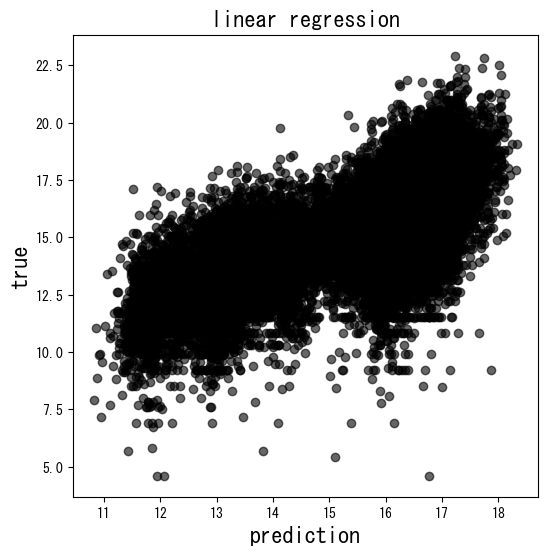

In [57]:
plt.figure(figsize=(6,6))
plt.plot(y_test_linear,y_test,marker="o",linestyle="",alpha=0.6,color="black")
plt.title("linear regression",size=16)
plt.xlabel("prediction",size=16)
plt.ylabel("true",size=16)

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [59]:
%%time
# Hyper Parameter Learning
hyper_para_learn = 1
if hyper_para_learn == 1:
    reg_rf_cv = GridSearchCV(reg_rf, {
        'max_depth': [2, 6, 10],
        'n_estimators': [100, 1000, 5000],
        'max_features': ['log2'],
        'n_jobs': [24]
    },
                             verbose=1)
    reg_rf_cv.fit(x_train, y_train)
    print(reg_rf_cv.best_params_)
    print(reg_rf_cv.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 1000, 'n_jobs': 24}
0.5700016893292682
CPU times: total: 2min 44s
Wall time: 6min 36s


In [60]:
# n_jobs should be adjusted to your computing environment
# in the server do not overuse computational resources
reg_rf = RandomForestRegressor(max_depth=10,
                               max_features='log2',
                               n_estimators=5000,
                               n_jobs=24)
reg_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=5000,
                      n_jobs=24)

In [61]:
# Prediction
y_test_rf = reg_rf.predict(x_test)

In [62]:
# Test error
mean_squared_error(y_test_rf, y_test)

1.2421864343389606

Text(0, 0.5, 'true')

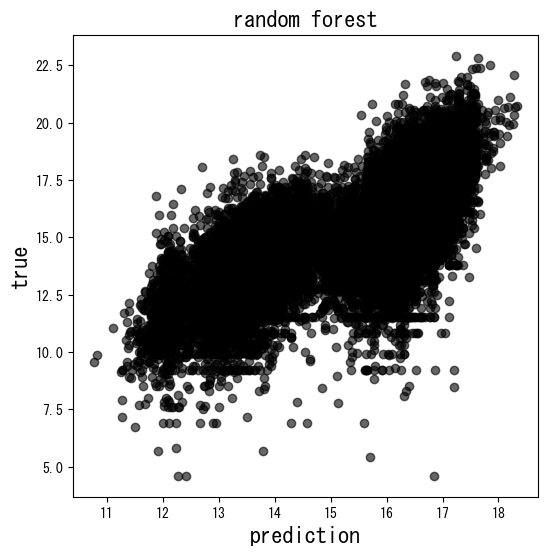

In [63]:
plt.figure(figsize=(6,6))
plt.plot(y_test_rf,y_test,marker="o",linestyle="",alpha=0.6,color="black")
plt.title("random forest",size=16)
plt.xlabel("prediction",size=16)
plt.ylabel("true",size=16)

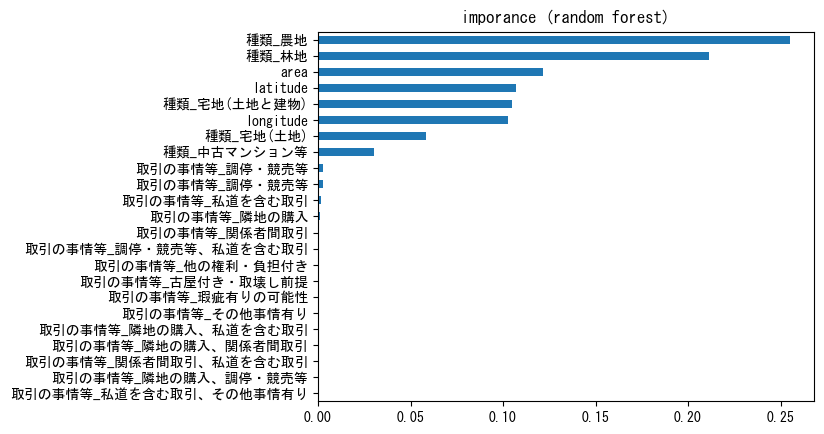

In [65]:
# Importance
importances = pd.Series(reg_rf.feature_importances_, index=df_x.columns)
importances = importances.sort_values()
importances.plot(kind="barh")
plt.title("imporance (random forest)")
plt.show()

# Gradient Boosting

In [66]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.6 MB/s eta 0:01:03
   ---------------------------------------- 0.4/99.8 MB 4.6 MB/s eta 0:00:22
   ---------------------------------------- 0.8/99.8 MB 7.2 MB/s eta 0:00:14
    --------------------------------------- 1.3/99.8 MB 8.5 MB/s eta 0:00:12
    --------------------------------------- 2.0/99.8 MB 9.1 MB/s eta 0:00:11
   - -------------------------------------- 2.9/99.8 MB 10.7 MB/s eta 0:00:10
   - -------------------------------------- 3.6/99.8 MB 12.1 MB/s eta 0:00:08
   - -----------------------------------

In [68]:
import xgboost as xgb
reg_xgb = xgb.XGBRegressor()

In [70]:
%%time
# Hyper Parameter Learning
hyper_para_learn = 1
if hyper_para_learn == 1:
    reg_xgb_cv = GridSearchCV(reg_xgb, {
        'max_depth': [2, 4, 6],
        'n_estimators': [50, 100, 500, 1000],
        'n_jobs': [24]
    },
                              verbose=1)
    reg_xgb_cv.fit(x_train, y_train)
    print(reg_xgb_cv.best_params_)
    print(reg_xgb_cv.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'max_depth': 4, 'n_estimators': 500, 'n_jobs': 24}
0.6853089159649866
CPU times: total: 8min 25s
Wall time: 2min 1s


In [71]:
# Set Parameters
reg_xgb = xgb.XGBRegressor(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=4,
                           n_jobs=24)

In [72]:
# Fit
reg_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=24,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
# prediction
y_test_xgb = reg_xgb.predict(x_test)

In [74]:
# Test error
mean_squared_error(y_test_xgb, y_test)

0.9156324651345576

Text(0, 0.5, 'true')

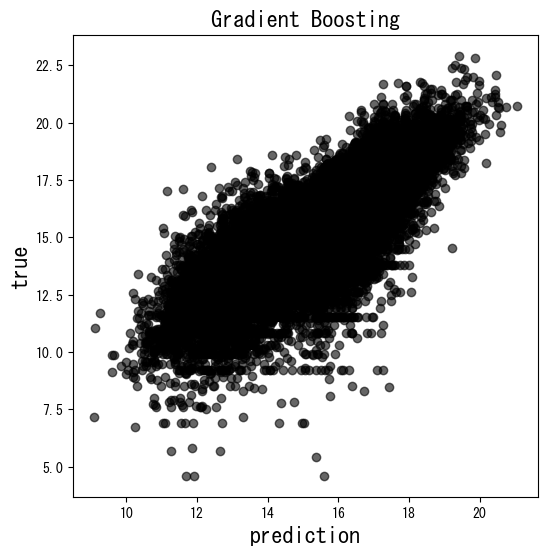

In [75]:
plt.figure(figsize=(6,6))
plt.plot(y_test_xgb,y_test,marker="o",linestyle="",alpha=0.6,color="black")
plt.title("Gradient Boosting",size=16)
plt.xlabel("prediction",size=16)
plt.ylabel("true",size=16)

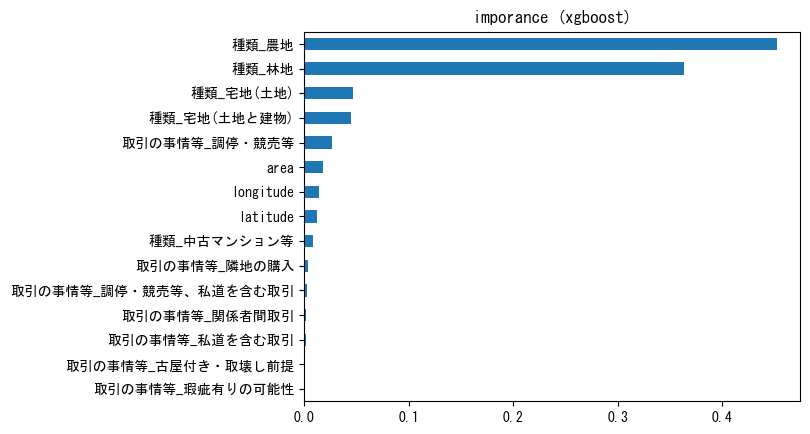

In [76]:
# Importance Measure
importances = pd.Series(reg_xgb.feature_importances_, index=df_x.columns)
importances = importances.sort_values()
importances[-15:].plot(kind="barh")
plt.title("imporance (xgboost)")
plt.show()